# Практическая работа 4 Журавлев А.Д. ББМО-02-23

# Загрузка датасета

In [1]:
import pandas as pd

# Загрузка данных из датасета:
url = "https://raw.githubusercontent.com/TQRG/security-patches-dataset/main/data/secbench/github-secbench-patches.csv"
data = pd.read_csv(url)

# Просмотр первых строк полученных данных:
print(data.head().to_string(index=False))

     owner  project                                      sha                                    sha-p  year language        cve_id  cwe_id  score severity
   pfsense  pfsense 002bc4ab3268e6e5cb3a01ce73a4c1624d09050a d6a0379d291f5e98500776618559343f40254e40  2010      php           NaN  CWE-77    NaN      NaN
 nextcloud   server 0074062b5329c3d43679909fddce2d70608a4475 5c6a7172cafc395d38c58d1b5afd6b36efb33ad5  2012      php           NaN  CWE-79    NaN      NaN
 nextcloud   server 0241ddc759f7e2d2695c4626df5d2ac27b8b1d90 c2e2c59ca7aa873bd07de04ea701a8b351383aec  2014      php           NaN CWE-384    NaN      NaN
  mantisbt mantisbt 00b4c17088fa56594d85fe46b6c6057bb3421102 b72fdaeb7cb8786401faab520d43092c8bdb44aa  2014      php CVE-2014-1608  CWE-89    7.5     HIGH
splitbrain dokuwiki 02b0b681935185a1c4d2d64e76fe499f3d438d12 10ffc9dd6a89562ef502baa21f968cf269fe21b0  2006      php           NaN  CWE-79    NaN      NaN


# Просмотр статистики по признакам и удаление строк с нулевым значением

Статистика по признаку 'year':
count     676.000000
mean     2012.168639
std         3.438944
min      1999.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: year, dtype: float64

Статистика по признаку 'score':
count    183.000000
mean       5.338798
std        1.557708
min        1.200000
25%        4.300000
50%        5.000000
75%        6.800000
max       10.000000
Name: score, dtype: float64

Статистика по признаку 'severity':
count        188
unique         8
top       MEDIUM
freq         129
Name: severity, dtype: object


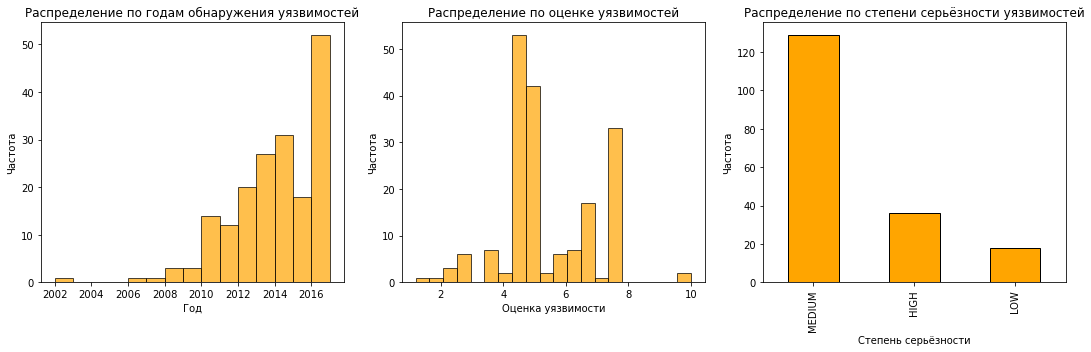

In [2]:
# Отображение статистики по признаку "year":
print("Статистика по признаку 'year':")
print(data['year'].describe())

# Просмотр статистики по признаку "score":
print("\nСтатистика по признаку 'score':")
print(data['score'].describe())

# Просмотр статистики по признаку "severity":
print("\nСтатистика по признаку 'severity':")
print(data['severity'].describe())

import matplotlib.pyplot as plt

# Удаление строк с нулевыми значениями:
data_cleaned = data.dropna(subset=['year', 'score', 'severity'])

# Построение графиков:
plt.figure(figsize=(15, 5))

# График для распределения оценки уязвимости:
plt.subplot(1, 3, 2)
plt.hist(data_cleaned['score'], bins=20, color= 'orange', edgecolor='black', alpha=0.7)
plt.title('Распределение по оценке уязвимостей')
plt.xlabel('Оценка уязвимости')
plt.ylabel('Частота')

# График для года обнаружения уязвимости:
plt.subplot(1, 3, 1)
plt.hist(data_cleaned['year'], bins=range(int(data_cleaned['year'].min()), int(data_cleaned['year'].max()) + 1), color= 'orange', edgecolor='black', alpha=0.7)
plt.title('Распределение по годам обнаружения уязвимостей')
plt.xlabel('Год')
plt.ylabel('Частота')

# График для степени серьёзности уязвимости:
plt.subplot(1, 3, 3)
severity_counts = data_cleaned['severity'].value_counts()
severity_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Распределение по степени серьёзности уязвимостей')
plt.xlabel('Степень серьёзности')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Выбор признаков для выбора модели МО с наилучшей оценкой точности по f1-мере

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Выбор признаков и целевой переменной:
X = data_cleaned[['year', 'score']]
y = data_cleaned['severity']

# Разделение данных на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация моделей:
log_reg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Список моделей:
models = [('Logistic Regression', log_reg), ('Support Vector Machine', svm), ('Random Forest', rf_classifier)]

# Обучение и оценка производительности моделей:
for name, model in models:
    # Обучение модели:
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке:
    y_pred = model.predict(X_test)

    # Оценка производительности с использованием F1-меры:
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{name}: F1-score = {f1}')

Logistic Regression: F1-score = 0.9379021879021878
Support Vector Machine: F1-score = 0.6157094594594594
Random Forest: F1-score = 0.9719901719901719


# Модель случайного леса имеет самый высокий показатель f1-меры, так что ее использовать предпочтительней